<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Regression Model Development (Individual Assignment)</h2>
***
DAT-5303 | Machine Learning<br>
<strong>Sai Pruthvi Konduru Venkata</strong><br> Student of Business Analytics<br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Purpose of this Script</h2><br>
In this assignment, students are tasked with using the information in course case to build a predictive model on a continuous response variable (Y-variable). This assignment comprises of feature engineering, model preparation, variable selection, and model development. This script is designed to achieve the objective of this assignment. It utilizes the Apprentice_Chef_Dataset.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Analytical Objectives</h2><br>
a) Make a prediction for the Revenue of Apprentice Chef , which is assumed to be a continuous variable.<br>
b) Identify key features that impact Revenue.<br>
c) Developing Top Insights.<br>
d) Building a Machine Learning model to predict revenue.
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Initial Exploration of the Dataset</h2><br>


Size of Original Dataset
------------------------
Observations  (rows): 1946
Features   (columns): 28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1

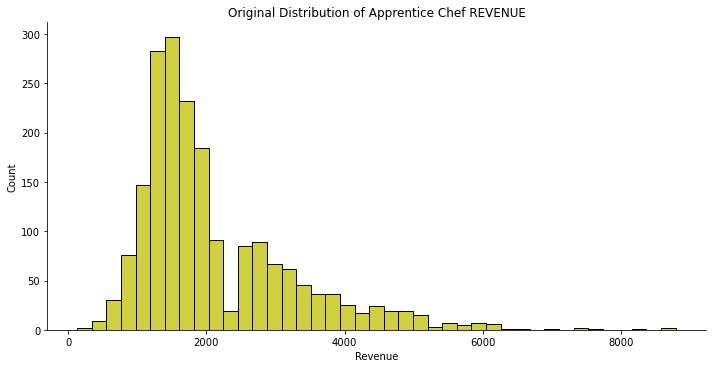

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import random as rand                 # random number generation
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler



# setting random seed
rand.seed(a = 327)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)


# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations  (rows): {chef.shape[0]}
Features   (columns): {chef.shape[1]}
""")


# Information about each feature
chef.info()


# developing a histogram using DISPLOT
sns.displot(data   = chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2, color = 'y')



plt.title(label   = "Original Distribution of Apprentice Chef REVENUE")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()
#the graph shows that the data is positively skewed


# descriptive statistics for numeric data
chef.describe(include = [int, float]).round(2)


In [2]:
# displaying the first five observations of the DataFrame
chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [3]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED', 
                   'MASTER_CLASSES_ATTENDED', 'TOTAL_PHOTOS_VIEWED']


# developing a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_PREP_VID_TIME          0.64
MEDIAN_MEAL_RATING         0.61
TOTAL_MEALS_ORDERED        0.60
TOTAL_PHOTOS_VIEWED        0.47
MASTER_CLASSES_ATTENDED    0.45
LARGEST_ORDER_SIZE         0.44
AVG_TIME_PER_SITE_VISIT    0.14
Name: REVENUE, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Feature Engineering</h2><br>

In [4]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  REVENUE ~ MEDIAN_MEAL_RATING  +
                                                  TOTAL_MEALS_ORDERED +
                                                  LARGEST_ORDER_SIZE  +
                                                  MASTER_CLASSES_ATTENDED +
                                                  TOTAL_PHOTOS_VIEWED +
                                                  AVG_PREP_VID_TIME +
                                                  AVG_CLICKS_PER_VISIT +
                                                  UNIQUE_MEALS_PURCH """,
                        data = chef)

# telling Python to FIT the data to the blueprint
stats = lm_practice.fit()


# printing a summary of the results
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     409.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:01:46   Log-Likelihood:                -15491.
No. Observations:                1946   AIC:                         3.100e+04
Df Residuals:                    1937   BIC:                         3.105e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [5]:
# log transforming REVENUE and saving it to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

# log transforming MEDIAN_MEAL_RATING and saving it to the dataset
chef['log_MEDIAN_MEAL_RATING'] = np.log10(chef['MEDIAN_MEAL_RATING'])

# log transforming TOTAL_MEALS_ORDERED and saving it to the dataset
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])

# log transforming LARGEST_ORDER_SIZE and saving it to the dataset
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE'])

# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# log transforming AVG_CLICKS_PER_VISIT and saving it to the dataset
chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef['AVG_CLICKS_PER_VISIT'])

# log transforming UNIQUE_MEALS_PURCH and saving it to the dataset
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])


In [6]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_base = smf.ols(formula = """log_REVENUE ~ log_MEDIAN_MEAL_RATING  + 
                                                    log_TOTAL_MEALS_ORDERED +
                                                    log_LARGEST_ORDER_SIZE  +
                                                    MASTER_CLASSES_ATTENDED +
                                                    TOTAL_PHOTOS_VIEWED +
                                                    log_AVG_PREP_VID_TIME +
                                                    log_AVG_CLICKS_PER_VISIT +
                                                    log_UNIQUE_MEALS_PURCH""",
                        data = chef)


# telling Python to FIT the data to the blueprint
stats = lm_base.fit()


# printing a summary of the results
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     602.1
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:01:46   Log-Likelihood:                 1474.9
No. Observations:                1946   AIC:                            -2932.
Df Residuals:                    1937   BIC:                            -2882.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [7]:
# taking the chef dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
log_MEDIAN_MEA

In [8]:
# instantiating an imputation value
fill = 'N/A'


# imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure all missing values have been taken care of
chef.isnull().any().any()

False

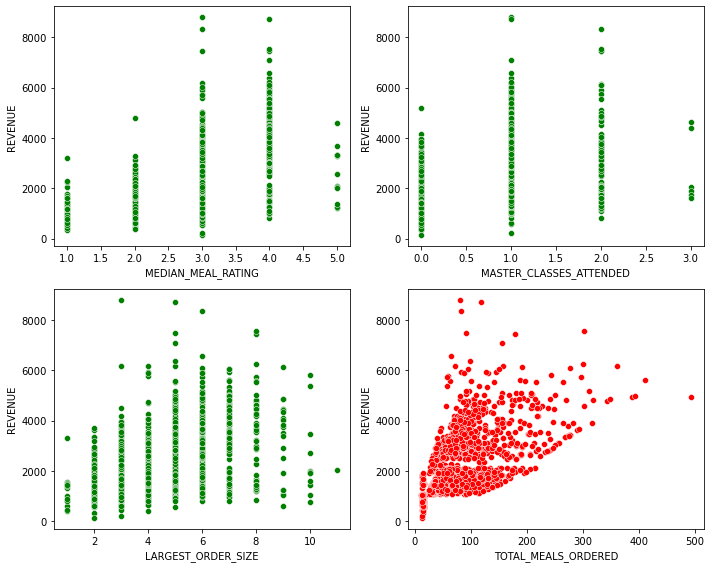

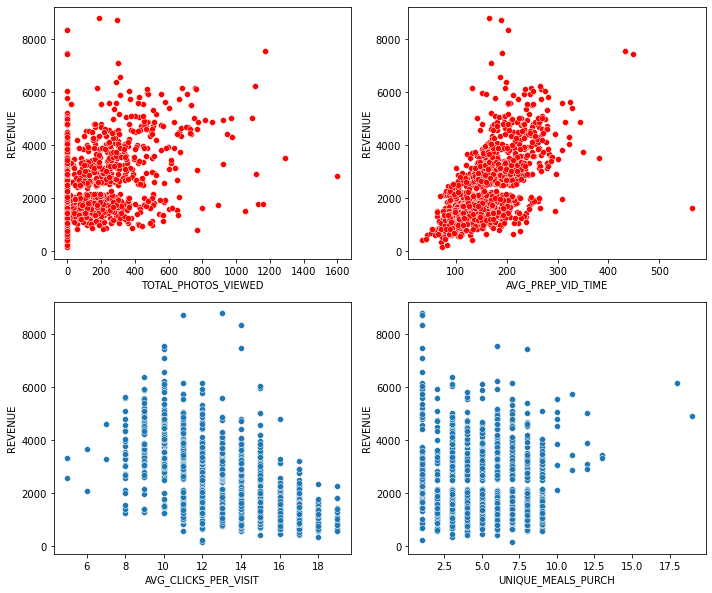

In [9]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
#plt.savefig('./analysis_images/Housing Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'])


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'])


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')



# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
#plt.savefig('./analysis_images/Housing Scatterplots 2 of 2.png')
plt.show()


In [10]:
# From the scatter plots above, it is evident that TOTAL_PHOTOS_VIEWED feature
# has high amount of zero values.

# counting the number of zeroes
TOTAL_PHOTOS_VIEWED_zeroes   = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])

# printing a table of the results
print(f"""
                            No\t\tYes
                          ---------------------
TOTAL_PHOTOS_VIEWED      | {TOTAL_PHOTOS_VIEWED_zeroes}\t\t{len(chef) - TOTAL_PHOTOS_VIEWED_zeroes}

""")


                            No		Yes
                          ---------------------
TOTAL_PHOTOS_VIEWED      | 1140		806




In [11]:
# dummy variable for TOTAL_PHOTOS_VIEWED.
chef['has_TOTAL_PHOTOS_VIEWED']   = 0


for index, value in chef.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'has_TOTAL_PHOTOS_VIEWED'] = 1

# checking results
chef[['has_TOTAL_PHOTOS_VIEWED']].head()

,has_TOTAL_PHOTOS_VIEWED
0,0
1,1
2,0
3,0
4,1


In [12]:
# developing a small correlation matrix
zeroes_corr = chef.corr().round(decimals = 2)


# checking the correlations of the newly-created variables with REVENUE
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['has_TOTAL_PHOTOS_VIEWED' ]].sort_values(ascending = False)

has_TOTAL_PHOTOS_VIEWED    0.37
Name: REVENUE, dtype: float64

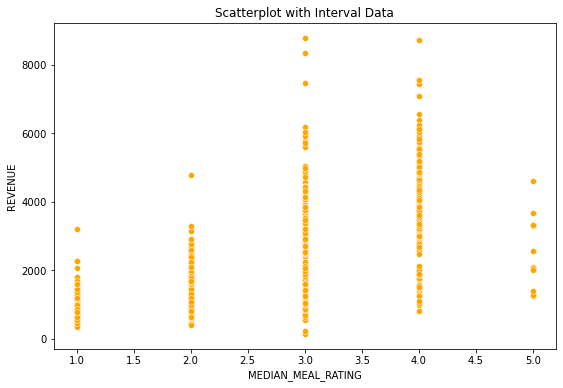

In [13]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))

# developing a scatterplot
sns.scatterplot(x    = 'MEDIAN_MEAL_RATING',
                y    = 'REVENUE',
                data = chef, color = 'orange')


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

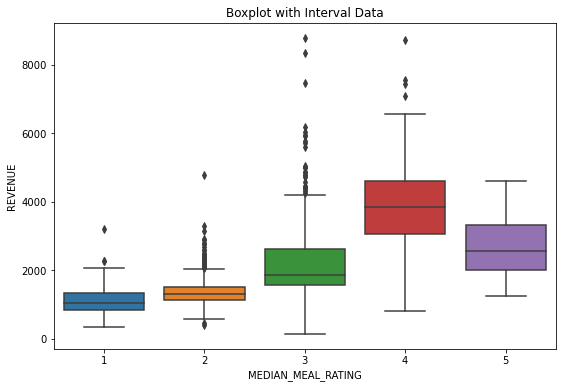

In [14]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))

# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

In [15]:

log_corr = chef.loc[ : , ['MEDIAN_MEAL_RATING',
                             'log_MEDIAN_MEAL_RATING',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['MEDIAN_MEAL_RATING', 'log_MEDIAN_MEAL_RATING'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61


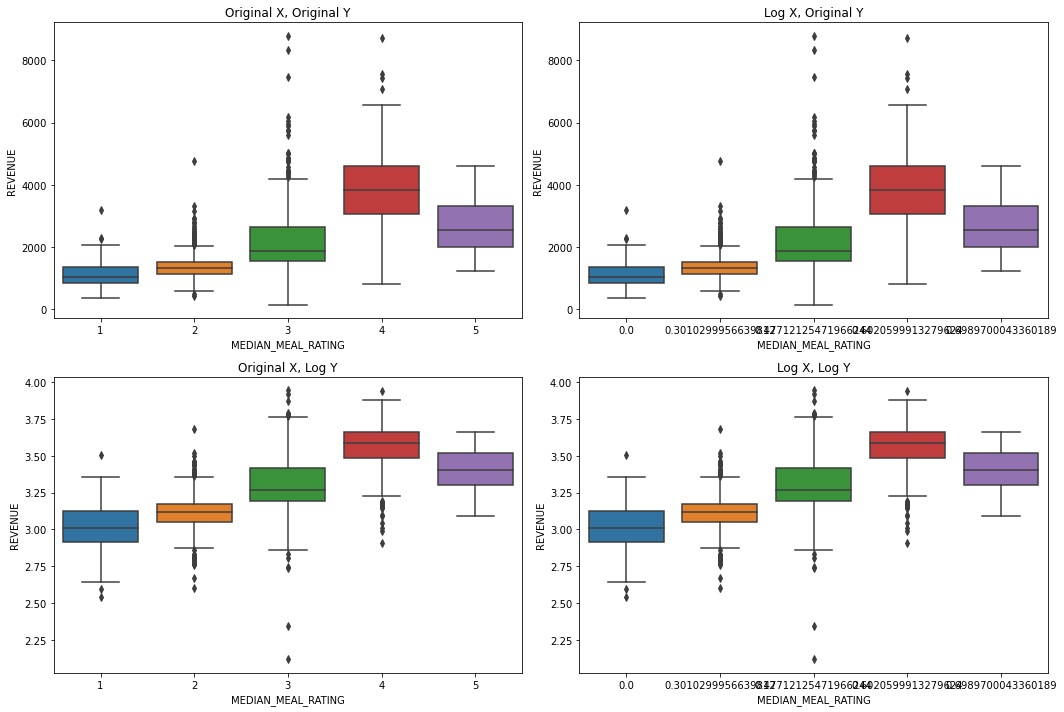

In [16]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'MEDIAN_MEAL_RATING',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_MEDIAN_MEAL_RATING',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'MEDIAN_MEAL_RATING',
            y     = 'log_REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


## Plot 4: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = np.log10(chef['MEDIAN_MEAL_RATING']),
            y     = np.log10(chef['REVENUE']),
            data  = chef)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()



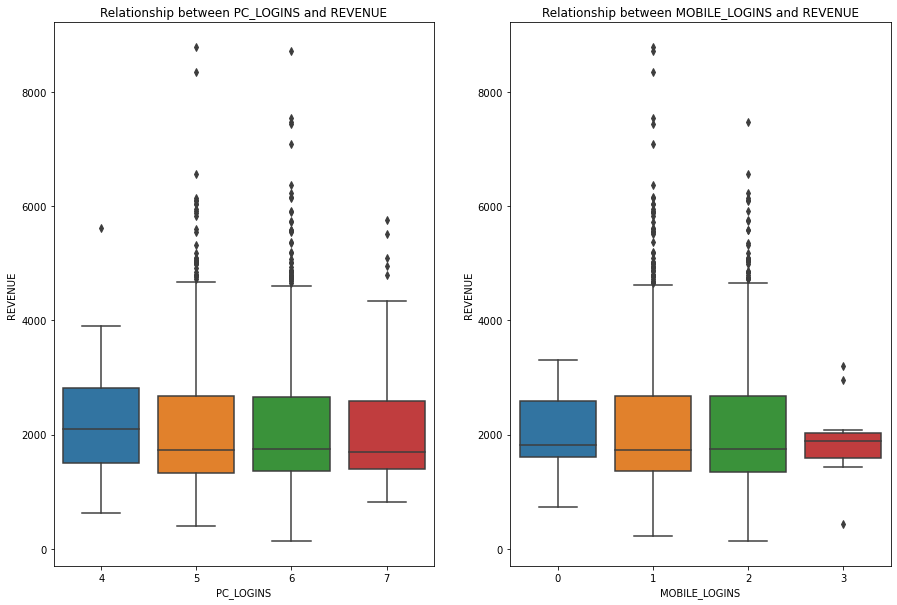


Count of LOGINS

----------
PC_LOGINS
----------
4     41
5    904
6    957
7     44
Name: PC_LOGINS, dtype: int64


----------
MOBILE_LOGINS
----------
0     16
1    999
2    919
3     12
Name: MOBILE_LOGINS, dtype: int64





In [17]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## PC_LOGINS ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'PC_LOGINS',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Relationship between PC_LOGINS and REVENUE')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')



## MOBILE_LOGINS ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'MOBILE_LOGINS',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Relationship between MOBILE_LOGINS and REVENUE')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for full and half baths
print(f"""
Count of LOGINS
==================

----------
PC_LOGINS
----------
{chef['PC_LOGINS'].value_counts(normalize = False).sort_index()}


----------
MOBILE_LOGINS
----------
{chef['MOBILE_LOGINS'].value_counts(normalize = False).sort_index()}


""")

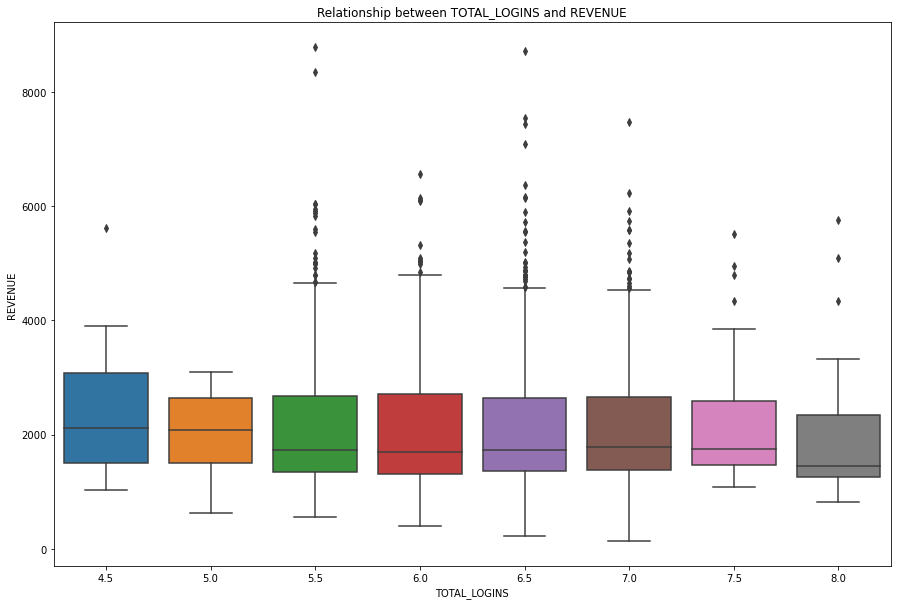


LOGINS

-----------
TOTAL_LOGINS
-----------
4.5     22
5.0     28
5.5    468
6.0    426
6.5    492
7.0    462
7.5     29
8.0     19
Name: TOTAL_LOGINS, dtype: int64


---------------------
LOGIN Correlations
---------------------
PC_LOGINS        0.02
MOBILE_LOGINS   -0.02
TOTAL_LOGINS     0.01
REVENUE          1.00
Name: REVENUE, dtype: float64




In [18]:
# total LOGINS
chef['TOTAL_LOGINS'] = chef['PC_LOGINS'] + (chef['MOBILE_LOGINS'] / 2 )


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'TOTAL_LOGINS',
            y    = 'REVENUE',
            data = chef)



# titles and labels
plt.title(label   = 'Relationship between TOTAL_LOGINS and REVENUE')
plt.xlabel(xlabel = 'TOTAL_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
LOGINS_corr = chef.loc[ : , ['PC_LOGINS',
                              'MOBILE_LOGINS',
                              'TOTAL_LOGINS',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
LOGINS
=========

-----------
TOTAL_LOGINS
-----------
{chef['TOTAL_LOGINS'].value_counts(normalize = False).sort_index()}


---------------------
LOGIN Correlations
---------------------
{LOGINS_corr['REVENUE']}

""")

In [19]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                        1.00
log_REVENUE                    0.95
AVG_PREP_VID_TIME              0.64
log_AVG_PREP_VID_TIME          0.63
log_TOTAL_MEALS_ORDERED        0.61
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
log_MEDIAN_MEAL_RATING         0.55
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
log_LARGEST_ORDER_SIZE         0.42
has_TOTAL_PHOTOS_VIEWED        0.37
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
MOBILE_NUMBER                  0.03
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
CANCELLATIONS_BEFORE_NOON      0.01
TASTES_AND_PREFERENCES         0.01
TOTAL_LOGINS                   0.01
WEEKLY_PLAN                    0.01
EARLY_DELIVERIES              -0.00
REFRIGERATED_LOCKER           -0.00
CROSS_SELL_SUCCESS             0.00
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
MOBILE_LOGINS               

In [20]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """ REVENUE ~ AVG_PREP_VID_TIME +
                                MEDIAN_MEAL_RATING +
                                log_TOTAL_MEALS_ORDERED +
                                log_MEDIAN_MEAL_RATING +
                                TOTAL_PHOTOS_VIEWED +
                                MASTER_CLASSES_ATTENDED +
                                LARGEST_ORDER_SIZE +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                UNIQUE_MEALS_PURCH +
                                log_UNIQUE_MEALS_PURCH
                                """,
                                data = chef)


# telling Python to run the data through the blueprint
stats_full = lm_full.fit()


# printing the results
print(stats_full.summary())


                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     486.2
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:01:52   Log-Likelihood:                -15233.
No. Observations:                1946   AIC:                         3.049e+04
Df Residuals:                    1935   BIC:                         3.055e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [21]:
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
mcdonalds.com        28
cocacola.com         28
jnj.com              28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
pg.com               22
mmm.com              22
verizon.com          22
caterpillar.com      22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [22]:
# email domain types
professional_email_domains  = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com',
                          '@me.com', '@aol.com', '@hotmail.com',
                       '@live.com', '@msn.com', '@passport.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', 
                      '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
    
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('PROFESSIONAL')
        

    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('PERSONAL')

    else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()

PERSONAL        1250
PROFESSIONAL     696
Name: domain_group, dtype: int64

In [23]:
# dummy variable for domain_group.
dummy = pd.get_dummies(chef['domain_group'])

# concatenating dummy with chef DataFrame
chef = pd.concat([chef, dummy],
                     axis = 1)

# converting the dummies to int64
chef['PROFESSIONAL'] = np.int64(chef['PROFESSIONAL'])
chef['PERSONAL'] = np.int64(chef['PERSONAL'])


In [24]:
my_df = ['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
         'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
         'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
         'TASTES_AND_PREFERENCES', 'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN', 
         'EARLY_DELIVERIES','LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
         'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
         'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED',
         'PROFESSIONAL','PERSONAL']


# developing a correlation matrix based on continuous features
chef_corr = chef[my_df].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
PRODUCT_CATEGORIES_VIEWED      0.03
MOBILE_NUMBER                  0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
PROFESSIONAL                   0.01
TASTES_AND_PREFERENCES         0.01
CANCELLATIONS_BEFORE_NOON      0.01
CROSS_SELL_SUCCESS             0.00
REFRIGERATED_LOCKER           -0.00
EARLY_DELIVERIES              -0.00
PERSONAL                      -0.01
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
MOBILE_LOGINS                 -0.02
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

In [25]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

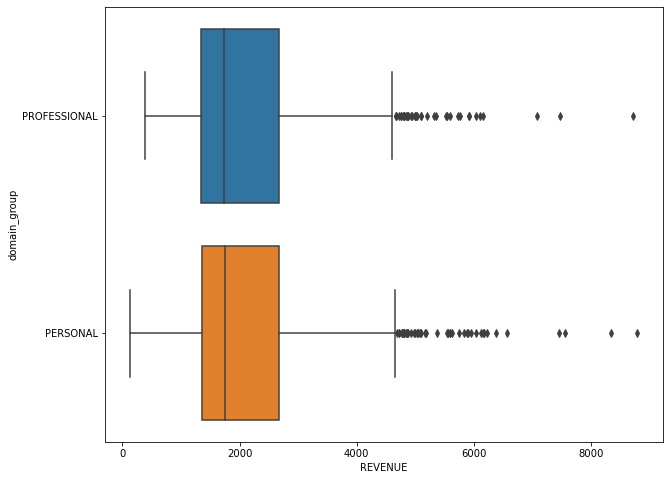

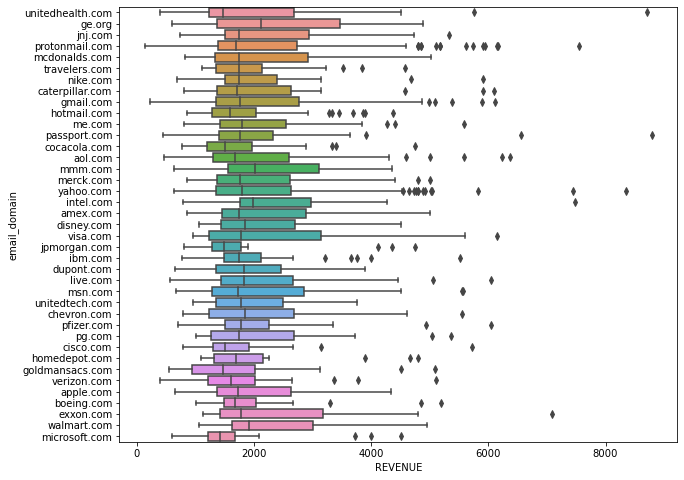

In [26]:
# calling the function for domain_group
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'domain_group',
					 data     = chef)

categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'email_domain',
					 data     = chef)



In [27]:
# dropping categorical variables after they've been encoded
chef = chef.drop('email_domain', axis = 1)
chef = chef.drop('domain_group', axis = 1)
chef = chef.drop('NAME', axis = 1)
chef = chef.drop('EMAIL', axis = 1)
chef = chef.drop('FIRST_NAME', axis = 1)
chef = chef.drop('FAMILY_NAME', axis = 1)

In [28]:
#Combining Features
chef['RV_PER_ORD'] = chef['REVENUE'] / chef['TOTAL_MEALS_ORDERED']

chef.loc[ : , 'FREQ_SPL_ORDS' ] = (chef.loc[ : , 'TOTAL_MEALS_ORDERED' ]/
                                                   chef.loc[ : ,'UNIQUE_MEALS_PURCH' ]).round(2)

chef.loc[ : , 'COMPLNT_MGMN' ] = (chef.loc[ : , 'CONTACTS_W_CUSTOMER_SERVICE' ]/
                                              chef.loc[ : , 'TOTAL_MEALS_ORDERED' ]).round(2)

chef.loc[ : , 'PROBLM_ORDRNG' ] = ((chef.loc[ : ,'EARLY_DELIVERIES'] + chef.loc[ : , 'LATE_DELIVERIES' ])/
                                    chef.loc[ : ,'TOTAL_MEALS_ORDERED' ]).round(2)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Training and Testing Sets</h2><br>

In [29]:
# preparing explanatory variable data
chef_data   = chef.drop(['REVENUE',
                               'log_REVENUE'],
                               axis = 1)


# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'log_REVENUE']

# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 37)
y-side: (1459,)


Testing Data
------------
X-side: (487, 37)
y-side: (487,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Ordinary Least Squares Regression</h2><br>

In [30]:
# declaring set of x-variables
x_variables = ['log_AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING','TOTAL_MEALS_ORDERED', 
               'TOTAL_PHOTOS_VIEWED','MASTER_CLASSES_ATTENDED','LARGEST_ORDER_SIZE', 
               'RV_PER_ORD','CROSS_SELL_SUCCESS','FREQ_SPL_ORDS',
               'PROBLM_ORDRNG','COMPLNT_MGMN']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_AVG_PREP_VID_TIME +
MEDIAN_MEAL_RATING +
TOTAL_MEALS_ORDERED +
TOTAL_PHOTOS_VIEWED +
MASTER_CLASSES_ATTENDED +
LARGEST_ORDER_SIZE +
RV_PER_ORD +
CROSS_SELL_SUCCESS +
FREQ_SPL_ORDS +
PROBLM_ORDRNG +
COMPLNT_MGMN +


In [31]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula = """ REVENUE ~ log_AVG_PREP_VID_TIME + 
                                            MEDIAN_MEAL_RATING +
                                            TOTAL_MEALS_ORDERED +
                                            TOTAL_PHOTOS_VIEWED +
                                            MASTER_CLASSES_ATTENDED +
                                            LARGEST_ORDER_SIZE +
                                            RV_PER_ORD +
                                            CROSS_SELL_SUCCESS +
                                            FREQ_SPL_ORDS +
                                            PROBLM_ORDRNG +
                                            COMPLNT_MGMN 
                                """,
                                data = chef_train)


# Step 2: fit the model based on the data
stats = lm_best.fit()



# Step 3: analyze the summary output
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     596.7
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:01:54   Log-Likelihood:                -11068.
No. Observations:                1459   AIC:                         2.216e+04
Df Residuals:                    1447   BIC:                         2.222e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3

In [32]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = chef[x_variables]


# preparing response variable
chef_target = chef['REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [33]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)



OLS Training Score : 0.8194
OLS Testing Score  : 0.7956
OLS Train-Test Gap : 0.0238


In [34]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -3692.53)
('log_AVG_PREP_VID_TIME', 1469.52)
('MEDIAN_MEAL_RATING', 208.33)
('TOTAL_MEALS_ORDERED', 10.48)
('TOTAL_PHOTOS_VIEWED', 0.56)
('MASTER_CLASSES_ATTENDED', 116.37)
('LARGEST_ORDER_SIZE', -26.28)
('RV_PER_ORD', 38.57)
('CROSS_SELL_SUCCESS', -21.9)
('FREQ_SPL_ORDS', 9.19)
('PROBLM_ORDRNG', -12.45)
('COMPLNT_MGMN', -1827.52)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Lasso Regression Model</h2><br>

In [35]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.8435
Lasso Testing Score  : 0.832
Lasso Train-Test Gap : 0.0115


In [36]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -3628.94)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.6)
('UNIQUE_MEALS_PURCH', 13.8)
('CONTACTS_W_CUSTOMER_SERVICE', 20.9)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 3.58)
('LARGEST_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 62.51)
('MEDIAN_MEAL_RATING', 84.56)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.46)
('log_MEDIAN_MEAL_RATING', 0.0)
('log_TOTAL_MEALS_ORDERED', 2354.02)
('log_LARGEST_ORDER_SIZE', -0.0)
('log_AVG_PREP_VID_TIME', 0.0)
('log_AVG_CLICKS_PER_VISIT', -830.45)
('log_UNIQUE_MEALS_PURCH', 0.0)
('has_TOTAL_PHOTOS_VIEWED', 0.0)
('TOTAL_LOGINS', -0.0)
('PERSONAL', -0.0)
('PROFESSIONAL', 0.0)
('RV_P

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>ARD Model</h2><br>

In [37]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.8855
Testing Score : 0.8768
ARD Train-Test Gap : 0.0087


In [38]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -988.97)
('CROSS_SELL_SUCCESS', -1.49002)
('TOTAL_MEALS_ORDERED', 0.26982)
('UNIQUE_MEALS_PURCH', -41.59891)
('CONTACTS_W_CUSTOMER_SERVICE', 96.64362)
('PRODUCT_CATEGORIES_VIEWED', -0.00056)
('AVG_TIME_PER_SITE_VISIT', -0.00011)
('MOBILE_NUMBER', 8e-05)
('CANCELLATIONS_BEFORE_NOON', 0.00109)
('CANCELLATIONS_AFTER_NOON', 44.13792)
('TASTES_AND_PREFERENCES', -0.00185)
('PC_LOGINS', -0.00137)
('MOBILE_LOGINS', -0.00181)
('WEEKLY_PLAN', 0.60278)
('EARLY_DELIVERIES', -3.03254)
('LATE_DELIVERIES', 0.00294)
('PACKAGE_LOCKER', 6.42399)
('REFRIGERATED_LOCKER', 0.00379)
('AVG_PREP_VID_TIME', 9.36675)
('LARGEST_ORDER_SIZE', -18.34708)
('MASTER_CLASSES_ATTENDED', 74.40914)
('MEDIAN_MEAL_RATING', 655.63665)
('AVG_CLICKS_PER_VISIT', -0.00232)
('TOTAL_PHOTOS_VIEWED', 0.47375)
('log_MEDIAN_MEAL_RATING', -3096.43794)
('log_TOTAL_MEALS_ORDERED', 2087.31463)
('log_LARGEST_ORDER_SIZE', -0.0007)
('log_AVG_PREP_VID_TIME', -2578.70406)
('log_AVG_CLICKS_PER_VISIT', -0.00208)
('log_UNIQUE_MEALS_P

In [39]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance1 = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance1 = pd.DataFrame(model_performance1)



Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8194           0.7956
Lasso      0.8435           0.832
ARD        0.8855           0.8768



In [40]:
prediction_results1 = pd.DataFrame(data = {
    'Original REVENUE' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })



In [41]:
# preparing explanatory variable data
chef_data   = chef.drop(['REVENUE',
                               'log_REVENUE'],
                               axis = 1)


# preparing the target variable
chef_target = chef.loc[ : , 'REVENUE']

In [42]:
## INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-3.08,-2.30,-3.88,-4.55,-5.38,-2.27,-0.84,-2.74,-1.34,-0.75,-1.38,-1.01,-0.73,-0.73
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.91,-0.55,-0.89,-0.70,-0.56,-0.52,-0.84,-1.18,-1.34,-0.75,-0.74,-0.69,-0.47,-0.58
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,0.36,0.04,-0.11,0.05,-0.12,0.29,-0.84,0.38,0.75,-0.75,-0.15,-0.27,-0.35,-0.29
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.36,0.67,0.50,0.61,0.66,0.83,1.19,1.17,0.75,1.34,0.44,0.30,-0.13,0.14
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,1.96,2.94,2.64,4.29,1.96,2.42,1.19,2.73,0.75,1.34,6.02,7.32,3.47,8.74


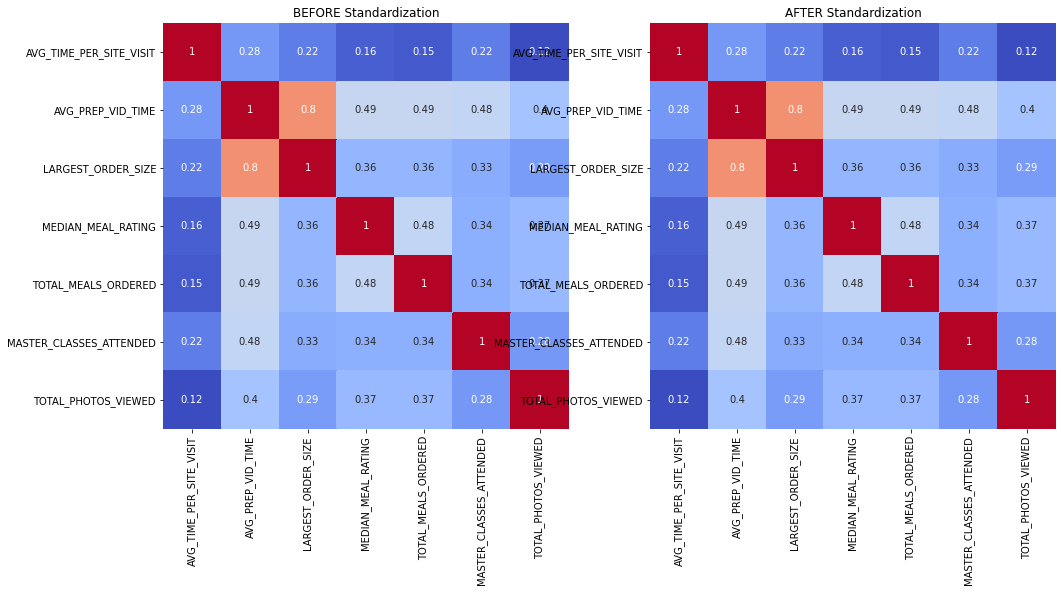

In [43]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = chef_data.columns

##############################################################################
# Unscaled Dataset
##############################################################################

# subsetting the original dataset
chef_subset = chef_data.loc[ : , ['AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME',
                                       'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 
                                       'TOTAL_MEALS_ORDERED', 'MASTER_CLASSES_ATTENDED', 
                                       'TOTAL_PHOTOS_VIEWED']]


# UNSCALED correlation matrix
df_corr = chef_subset.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar)



##############################################################################
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = x_scaled_df.loc[ : , ['AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME',
                                       'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 
                                       'TOTAL_MEALS_ORDERED', 'MASTER_CLASSES_ATTENDED', 
                                       'TOTAL_PHOTOS_VIEWED']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")


# setting plot window
plt.subplot(1, 2, 2)


# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar


# titling the plot
plt.title("AFTER Standardization")
plt.show()

<br>

Notice how the correlations are still in tact, implying that we have not altered the strengths of our linear relationships. However, such standardization can have profound effects on distance-based algorithms.
<br><br>
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>k-Nearest Neighbors with Non-Standardized Data</h2><br>

In [44]:
# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)

In [45]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.6529
KNN Train-Test Gap: 0.3471


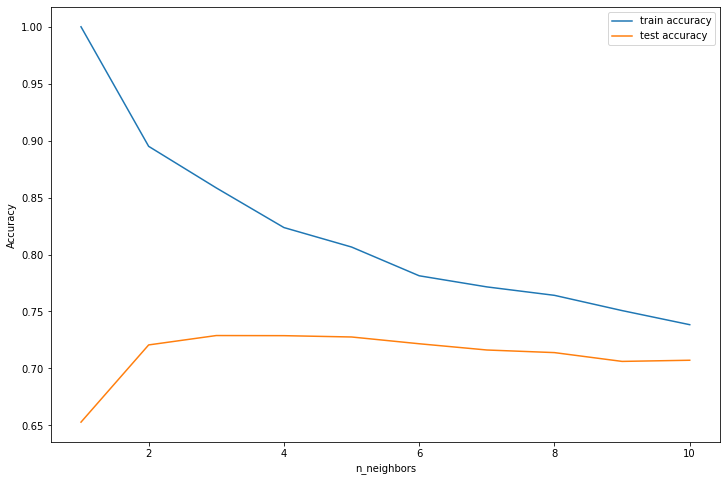

In [46]:
# creating lists for training set accuracy and test set accuracy
train_accuracy = []
test_accuracy  = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 11)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    train_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, train_accuracy, label = "train accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [47]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 3


In [48]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.8585
KNN Testing Score : 0.7289
KNN Train-Test Gap: 0.1296


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>k-Nearest Neighbors with Standardized Data</h2><br>

In [49]:
# this is the exact code we were using before
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 219)

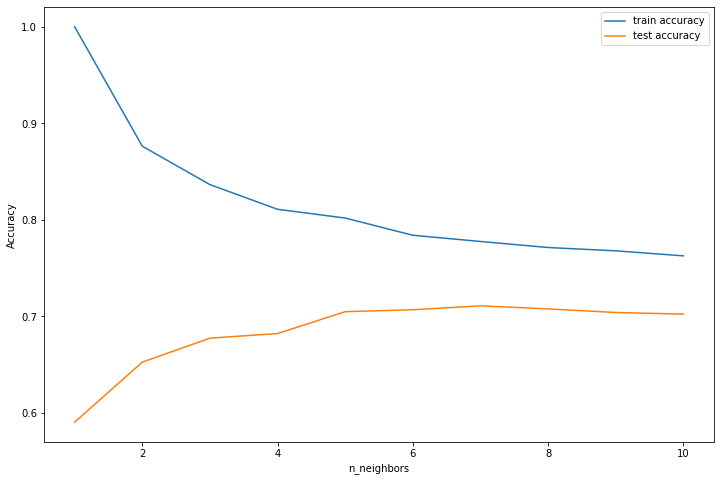

The optimal number of neighbors is 7


In [50]:
# creating lists for training set accuracy and test set accuracy
train_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 11)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    train_accuracy.append(clf.score(x_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, train_accuracy, label = "train accuracy")
plt.plot(neighbors_settings, test_accuracy,  label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [51]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 21)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(x_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(x_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(x_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(x_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(x_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.7287
KNN Testing Score : 0.6868
KNN Train-Test Gap: 0.0419


In [52]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      3             {knn_opt_score_train}           {knn_opt_score_test}
Standardized          21            {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance2 = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              0.6529
Non-Standardized      3             0.8585           0.7289
Standardized          21            0.7287           0.6868



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Overall Model Performance</h2><br>

In [53]:
# converting model_performance into a DataFrame
model_performance2 = pd.DataFrame(model_performance2)


# concatenating with former performance DataFrame
total_performance = pd.concat([model_performance1, model_performance2],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)

# checking the results
total_performance

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.8194,0.7956,0.0238,12,"[(intercept, -3692.53), (log_AVG_PREP_VID_TIME..."
1,Lasso,0.8435,0.8320,0.0115,38,"[(intercept, -3628.94), (CROSS_SELL_SUCCESS, -..."
2,ARD,0.8855,0.8768,0.0087,38,"[(intercept, -988.97), (CROSS_SELL_SUCCESS, -1..."
0,KNN_Not_Standardized,1.0000,0.6529,0.3471,NA,NA
1,KNN_Not_Standardized_Opt,0.8585,0.7289,0.1296,NA,NA
2,KNN_Standardized_Opt,0.7287,0.6868,0.0419,NA,NA


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Overall Model Predictions</h2><br>

In [54]:
# converting model_performance into a DataFrame
prediction_results2 = pd.DataFrame({
    'KNN' : knn_stand_pred.round(decimals = 2),
    'KNN Deviations' : knn_stand_pred.round(decimals = 2) - prediction_results1['Original REVENUE']})


# concatenating with former performance DataFrame
all_predictions = pd.concat([prediction_results1, prediction_results2],
                              axis = 1)

# checking the results
all_predictions.head(n = 5)

,Original REVENUE,LR Predictions,Lasso Predictions,ARD Predictions,LR Deviation,Lasso Deviation,ARD Deviation,KNN,KNN Deviations
640,1000.0,1176.42,1365.10,1224.81,176.42,365.10,224.81,861.90,-138.10
49,645.0,-506.84,7.55,464.83,-1151.84,-637.45,-180.17,777.57,132.57
1307,1740.0,2030.87,2015.90,1900.73,290.87,275.90,160.73,2120.76,380.76
914,2502.5,3257.31,2698.18,2876.77,754.81,195.68,374.27,2199.81,-302.69
803,4260.0,2991.70,3122.27,3416.27,-1268.30,-1137.73,-843.73,2158.83,-2101.17


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>SUMMARY</h2><br>
After analyzing the data and building an appropriate Machine Learning model that would predict revenue over the first year of each customer’s life cycle in Apprentice Chef, the ARD model has the least train-test gap among the models built. Although the model size of ARD is larger when compared to OLS model, its testing score is the highest amongst all the other models. Therefore,<strong> ARD model is the ideal fit</strong> to generate better insights of revenue.
<br><br>
After three years of serving customers across the San Francisco Bay Area, the management at Apprentice Chef can now understand and predict how much revenue to expect from each customer within their first year of using their services.
<br><br>
<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 


~~~
  _    _                             _ 
 | |  | |                           | |
 | |__| | ___   ___  _ __ __ _ _   _| |
 |  __  |/ _ \ / _ \| '__/ _` | | | | |
 | |  | | (_) | (_) | | | (_| | |_| |_|
 |_|  |_|\___/ \___/|_|  \__,_|\__, (_)
                                __/ |  
                               |___/   
~~~
~~~


                                                  ,---,  
                                               ,`--.' |  
           .---.                        ___    |   :  :  
          /. ./|                      ,--.'|_  '   '  ;  
      .--'.  ' ;   ,---.     ,---.    |  | :,' |   |  |  
     /__./ \ : |  '   ,'\   '   ,'\   :  : ' : '   :  ;  
 .--'.  '   \' . /   /   | /   /   |.;__,'  /  |   |  '  
/___/ \ |    ' '.   ; ,. :.   ; ,. :|  |   |   '   :  |  
;   \  \;      :'   | |: :'   | |: ::__,'| :   ;   |  ;  
 \   ;  `      |'   | .; :'   | .; :  '  : |__ `---'. |  
  .   \    .\  ;|   :    ||   :    |  |  | '.'| `--..`;  
   \   \   ' \ | \   \  /  \   \  /   ;  :    ;.--,_     
    :   '  |--"   `----'    `----'    |  ,   / |    |`.  
     \   \ ;                           ---`-'  `-- -`, ; 
      '---"                                      '---`"  
                                                         


~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> <br>